In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import pandas as pd

#On indique à Pandas qu'on travaille sur une serie temporel en lui indiquant que notre index sera la colonne qui représente nos dates index_col='created_at'
# Il faut aussi dire qu'il l'interprete comme un date parse_dates=True
df = pd.read_csv('../data/metrics.csv', index_col='created_at',parse_dates=True)


In [99]:
df.head()

,id,status,cyan_capacity,cyan_remaining,magenta_capacity,magenta_remaining,yellow_capacity,yellow_remaining,black_capacity,black_remaining,machineId,connected_operators,varnishLevelsTargetvolume,varnishLevelsTotalvolume,modules,events
created_at,,,,,,,,,,,,,,,,
2022-06-07 12:23:52.164,5561325,WARNING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""JAN"", ""level"": ""Operator""}]",22050.818386,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]
2022-06-03 08:44:57.996,5513803,IDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""Viktor"", ""level"": ""Operator""}]",22402.256226,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]
2022-06-03 08:50:28.520,5514125,IDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""Viktor"", ""level"": ""Operator""}]",22402.256226,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]
2022-06-03 08:44:47.992,5513794,IDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""Viktor"", ""level"": ""Operator""}]",22402.256226,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]
2022-06-03 08:46:18.097,5513880,IDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""Viktor"", ""level"": ""Operator""}]",22402.256226,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...","[{""source"": ""PLC"", ""message"": "" Plateau de têt..."


In [100]:
df.index

DatetimeIndex(['2022-06-07 12:23:52.164000', '2022-06-03 08:44:57.996000',
               '2022-06-03 08:50:28.520000', '2022-06-03 08:44:47.992000',
               '2022-06-03 08:46:18.097000', '2022-06-03 08:47:38.284000',
               '2022-06-03 08:45:18.032000', '2022-06-07 12:24:12.191000',
               '2022-06-03 08:45:38.052000', '2022-06-03 08:45:28.057000',
               ...
               '2022-12-12 08:19:48.688000', '2022-12-12 08:20:07.769000',
               '2022-12-12 08:20:27.795000', '2022-12-12 08:20:47.870000',
               '2022-12-12 08:21:28.092000', '2022-12-12 08:20:17.777000',
               '2022-12-12 08:20:57.846000', '2022-12-12 08:21:08.067000',
               '2022-12-12 08:21:18.076000', '2022-12-12 08:21:38.102000'],
              dtype='datetime64[ns]', name='created_at', length=1164430, freq=None)

In [101]:
df['status'] = df['status'].replace('ERR', 'ERROR')


In [102]:
#On convertit la colonne "status" en une valeur numérique.
status_map = {'IDLE': 0, 'WARNING': 1, 'ERROR': 2}
df['status'] = df['status'].map(status_map)


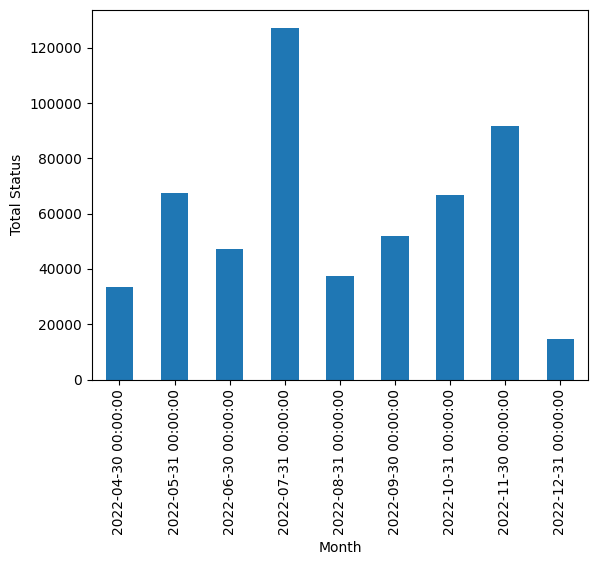

In [103]:
monthly_status_sum = df['status'].resample('M').sum()

# Plot the aggregated data
monthly_status_sum.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Status')
plt.show()

#Nombre de status par mois

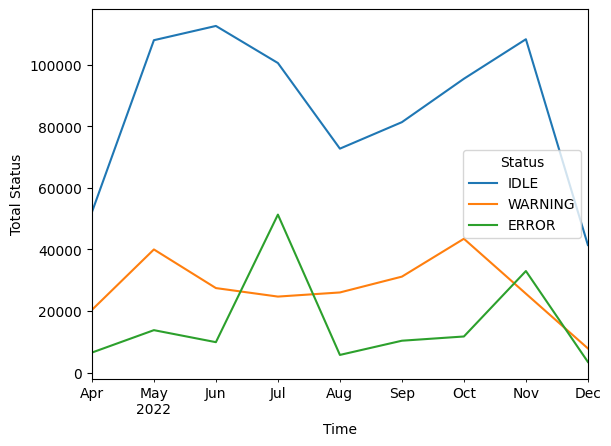

In [104]:
# Resample the data by month and group by 'status'
monthly_status_grouped = df.groupby('status').resample('M').size()
monthly_status_grouped.loc[0].plot(label='IDLE')
monthly_status_grouped.loc[1].plot(label='WARNING')
monthly_status_grouped.loc[2].plot(label='ERROR')
plt.xlabel('Time')
plt.ylabel('Total Status')
plt.legend(title='Status', loc='best')
plt.show()

#Repartition des 3 classes dans tout le dataset dans le Temps

In [105]:
first_date = df.index.min()
last_date = df.index.max()

print('First date:', first_date)
print('Last date:', last_date)


First date: 2022-04-15 05:55:06.678000
Last date: 2022-12-12 08:21:38.102000


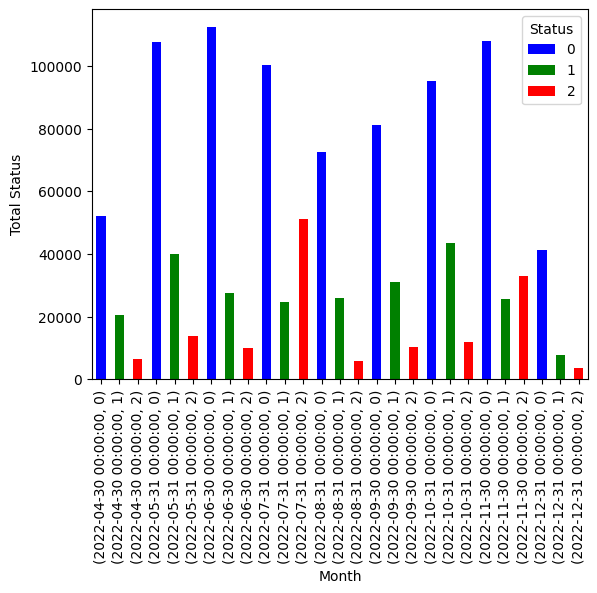

In [106]:

# Define custom colors for each 'status' category
colors = ['blue', 'green', 'red']

# Plot the grouped data with custom colors
ax = monthly_status_grouped.unstack().plot.bar(stacked=True, color=colors)

plt.xlabel('Month')
plt.ylabel('Total Status')

# Add legends for each 'status' category
for i, status in enumerate(monthly_status_grouped.index.get_level_values(0).unique()):
    ax.bar(0, 0, color=colors[i], label=status)
plt.legend(title='Status', loc='best')

plt.show()


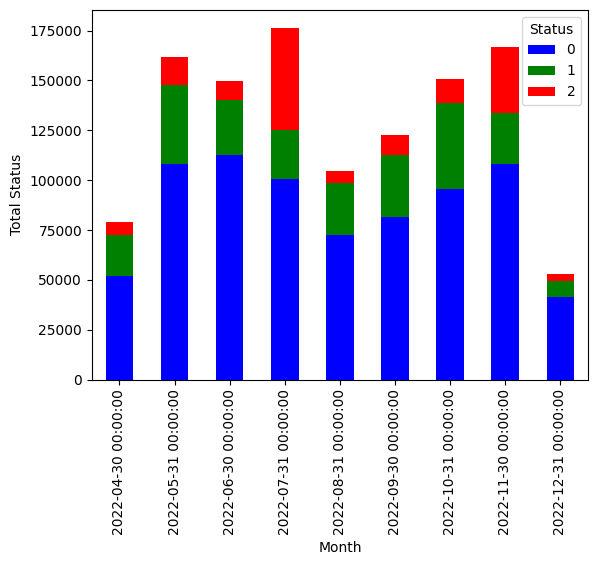

In [110]:
# Group the data by month and 'status'
monthly_status_grouped = df.groupby(['status', pd.Grouper(freq='M')]).size()

# Reshape the data to have one column per 'status' category
monthly_status_pivoted = monthly_status_grouped.unstack(level=0)

# Define custom colors for each 'status' category
colors = ['blue', 'green', 'red']

# Create a stacked bar chart
ax = monthly_status_pivoted.plot(kind='bar', stacked=True, color=colors)

# Set the x-axis label and the y-axis label
ax.set_xlabel('Month')
ax.set_ylabel('Total Status')

# Add legends for each 'status' category
ax.legend(title='Status', loc='best')

plt.show()
